In [ ]:
#Importados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as pl
import seaborn as sns

In [ ]:
#conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#traer documento
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSu_3xbzvwqg6MpBKKDB3u8YHK31h6CTK5z1MClZorpRvHz4gTYJdv3IrrdSzwBA3gHuxlY7hsShEpZ/pub?output=csv'
df = pd.read_csv(url)
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df = df.rename(columns={'has-ring':'Tiene anillo', 'season':'estacion', 'cap-diameter':'diametro-sombrero', 'cap-surface':'superficie-sombrero', 'cap-shape':'forma-sombrero', 'cap-color':'color-sombrero', 'does-bruise-or-bleed':'tiene hemorragias o morados', 'gill-attachment':'adherencia-branquia', 
                         'gill-spacing':'espacio-branquia', 'gill-color':'color-branquia', 'stem-height':'tallo-altura', 'stem-width':'ancho-tallo', 'stem-root':'raiz-tallo', 'stem-surface':'superficie-tallo',  
                           'stem-color':'color-tallo', 'veil-type':'tipo-velo', 'veil-color':'color-velo', 'ring-type': 'tipo-anillo', 'spore-print-color': 'esporada', 'class':'clase',   'habitat':'hábitat'})

df.columns

Index(['clase', 'diametro-sombrero', 'forma-sombrero', 'superficie-sombrero',
       'color-sombrero', 'tiene hemorragias o morados', 'adherencia-branquia',
       'espacio-branquia', 'color-branquia', 'tallo-altura', 'ancho-tallo',
       'raiz-tallo', 'superficie-tallo', 'color-tallo', 'tipo-velo',
       'color-velo', 'Tiene anillo', 'tipo-anillo', 'esporada', 'hábitat',
       'estacion'],
      dtype='object')

In [ ]:
#Limpieza y procesamiento

# Buscar duplicados
print('Duplicados:', df.duplicated().sum())

# Eliminar duplicados
df.drop_duplicates(inplace = True)

# Confirmación
print('Duplicados:', df.duplicated().sum())

Duplicados: 0
Duplicados: 0


In [ ]:
#Encontrar datos faltantes
print('Datos faltantes:', df.isna().sum().sum())

# Encontrar datos faltantes por c
print(df.isna().sum())

Datos faltantes: 0
clase                          0
diametro-sombrero              0
forma-sombrero                 0
superficie-sombrero            0
color-sombrero                 0
tiene hemorragias o morados    0
adherencia-branquia            0
espacio-branquia               0
color-branquia                 0
tallo-altura                   0
ancho-tallo                    0
color-tallo                    0
Tiene anillo                   0
tipo-anillo                    0
hábitat                        0
estacion                       0
dtype: int64


In [ ]:
# Encontrar porcentaje de datos faltantes

for col, n in zip(df.isna().sum().index, df.isna().sum().values):
  if n > 0:
    print(f'Porcentaje de datos faltantes en {col} es {round(n / len(df) * 100, 2)}')

Porcentaje de datos faltantes en superficie-sombrero es 23.18
Porcentaje de datos faltantes en adherencia-branquia es 16.18
Porcentaje de datos faltantes en espacio-branquia es 41.14
Porcentaje de datos faltantes en raiz-tallo es 84.59
Porcentaje de datos faltantes en superficie-tallo es 62.57
Porcentaje de datos faltantes en tipo-velo es 94.79
Porcentaje de datos faltantes en color-velo es 87.83
Porcentaje de datos faltantes en tipo-anillo es 4.06
Porcentaje de datos faltantes en esporada es 89.62


##Las columnas  raiz-tallo, superficie-tallo, color-velo, tipo-velo y esporada
tienen más del 60 por ciento con datos faltantes. Son demasiados datos faltantes. Los suprimiré.

In [ ]:
# Eliminación de las columnas mencionadas.
df.dropna(axis = 1, thresh = int(0.4*len(df)), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60923 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   clase                        60923 non-null  object 
 1   diametro-sombrero            60923 non-null  float64
 2   forma-sombrero               60923 non-null  object 
 3   superficie-sombrero          46803 non-null  object 
 4   color-sombrero               60923 non-null  object 
 5   tiene hemorragias o morados  60923 non-null  object 
 6   adherencia-branquia          51068 non-null  object 
 7   espacio-branquia             35861 non-null  object 
 8   color-branquia               60923 non-null  object 
 9   tallo-altura                 60923 non-null  float64
 10  ancho-tallo                  60923 non-null  float64
 11  color-tallo                  60923 non-null  object 
 12  Tiene anillo                 60923 non-null  object 
 13  tipo-anillo     

Tomado de la doc de pandas: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.dropna.html

In [ ]:
#Las columnas con menos de 60% y con datos faltantes serán reemplazados con M
df.fillna('M', inplace = True)

In [ ]:
# confirmación
print('Datos que faltan:', df.isna().sum().sum())

Datos que faltan: 0


In [ ]:
# Buscar labels que no son consistentes
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print('Column:', col)
  print(df[col].value_counts(normalize = True))
  print()

Column: clase
p    0.553847
e    0.446153
Name: clase, dtype: float64

Column: forma-sombrero
x    0.442066
f    0.220015
s    0.117591
b    0.093462
o    0.054429
p    0.042644
c    0.029792
Name: forma-sombrero, dtype: float64

Column: superficie-sombrero
M    0.231768
t    0.134334
s    0.124419
y    0.104082
h    0.081644
g    0.077508
d    0.072748
e    0.042414
k    0.037802
i    0.036522
w    0.035290
l    0.021470
Name: superficie-sombrero, dtype: float64

Column: color-sombrero
n    0.397305
y    0.140193
w    0.125552
g    0.070778
e    0.066231
o    0.059961
r    0.029201
u    0.028052
p    0.027953
k    0.020994
b    0.020189
l    0.013591
Name: color-sombrero, dtype: float64

Column: tiene hemorragias o morados
f    0.826174
t    0.173826
Name: tiene hemorragias o morados, dtype: float64

Column: adherencia-branquia
a    0.208411
d    0.168196
M    0.161762
x    0.121678
p    0.098501
e    0.092707
s    0.092707
f    0.056038
Name: adherencia-branquia, dtype: float64

Colu

###NO hay datos incosistentes. 

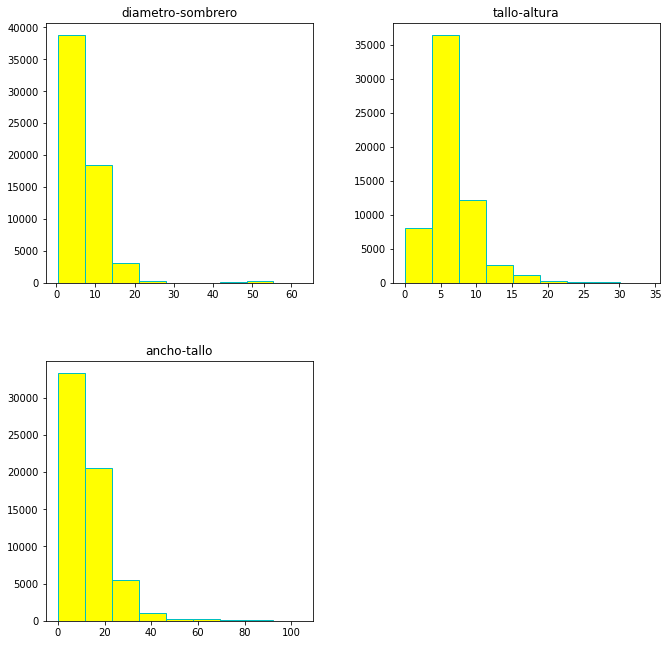

In [ ]:
# Hacer histogramas de datos numéricos.
df.hist(grid = False,
        color = 'yellow',
        edgecolor = 'c',
        figsize = (11, 11),
        bins = 9);

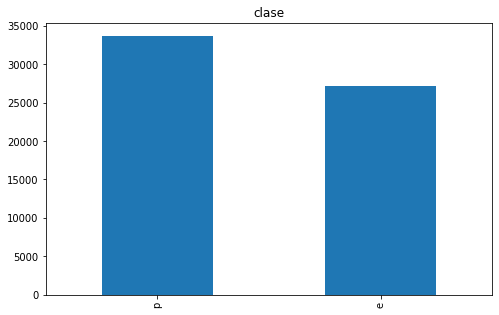

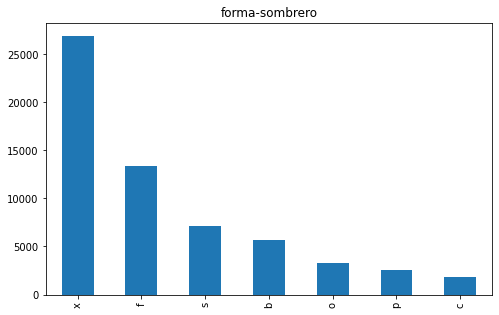

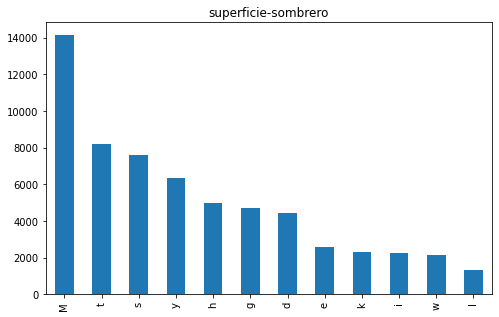

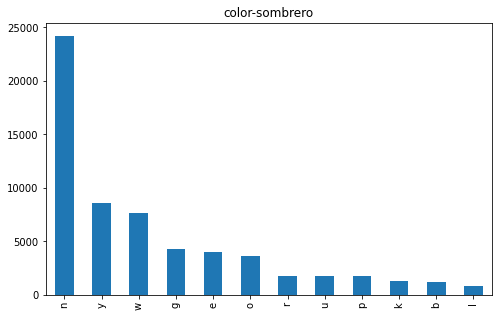

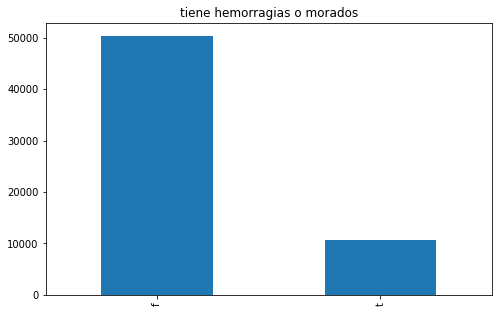

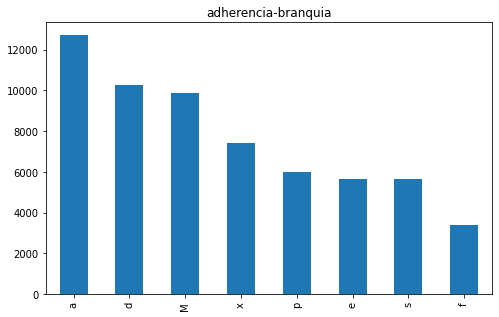

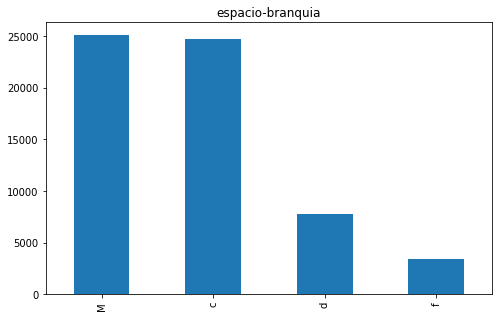

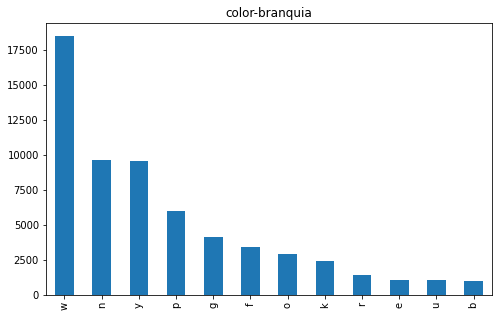

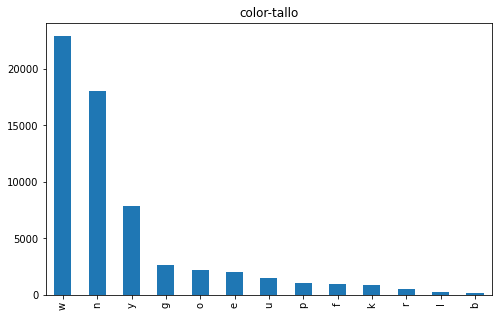

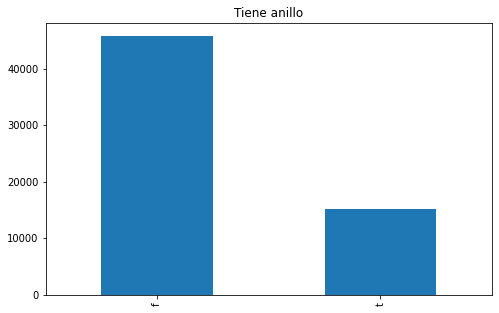

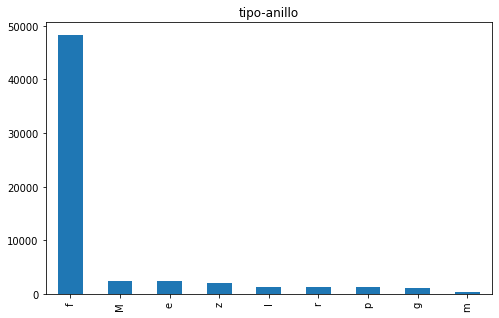

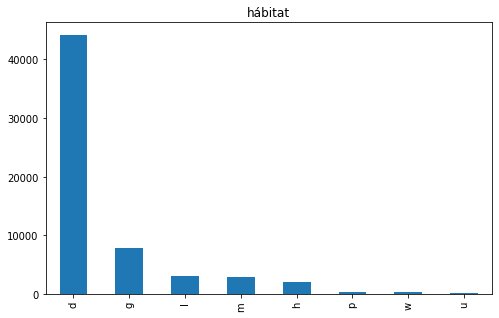

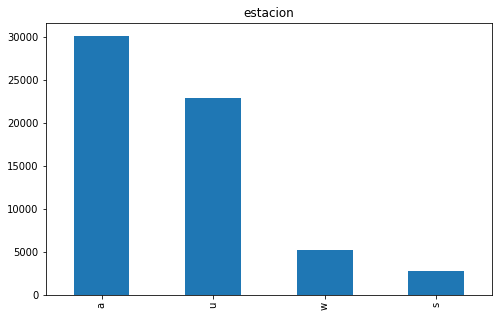

In [ ]:
# Exploración de los datos categoricos.
for col in df.select_dtypes(include = 'object'):
  plt.figure(figsize = (8, 5));
  df[col].value_counts().plot.bar(title = col);
  plt.show();
  print()

###Despues de estas visualizaciones creo que debo buscar en las variables numéricas alguna correlación para eso se necesita el mapa de calor.

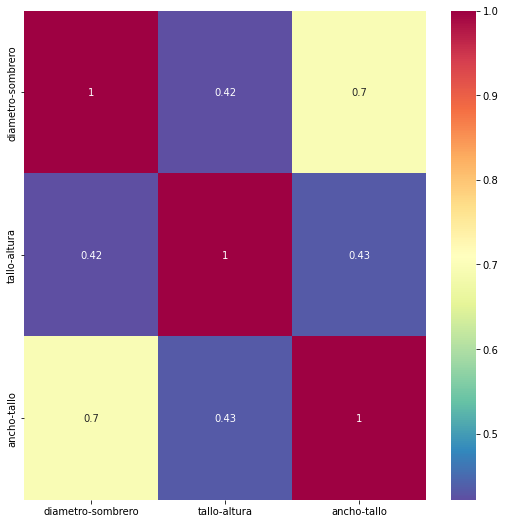

In [ ]:
corr = df.corr()
plt.figure(figsize = (9, 9));
sns.heatmap(corr, cmap = 'Spectral_r', annot = True);

A través de esta gráfica se puede apreciar una relación entre el ancho del tallo y el diametro del sombrero. Esta relación si la vemos desde la lógica tiene mucho sentido, pues a más diametro y peso del sombrero más tallo se necesita para soportarlo. Creo conveniente hacer un grafico de dispersión en este hallazgo.

In [ ]:
# Cambiar el nombre para más claridad.
df['clase'].replace({'e': 'comestible', 'p': 'venenoso'}, inplace = True)
# Confirmación
df['clase'].value_counts()

venenoso      33742
comestible    27181
Name: clase, dtype: int64

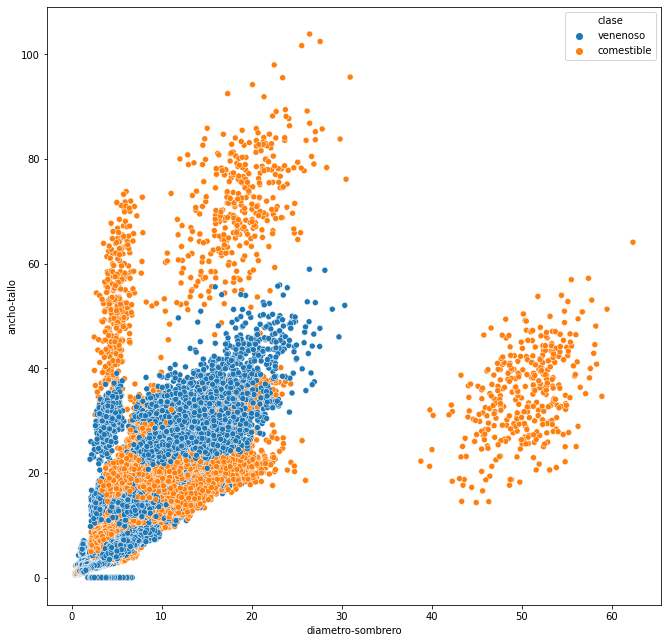

In [ ]:
plt.figure(figsize = (11, 11))
sns.scatterplot(x = df['diametro-sombrero'], 
            y = df['ancho-tallo'],
            hue = df['clase']);

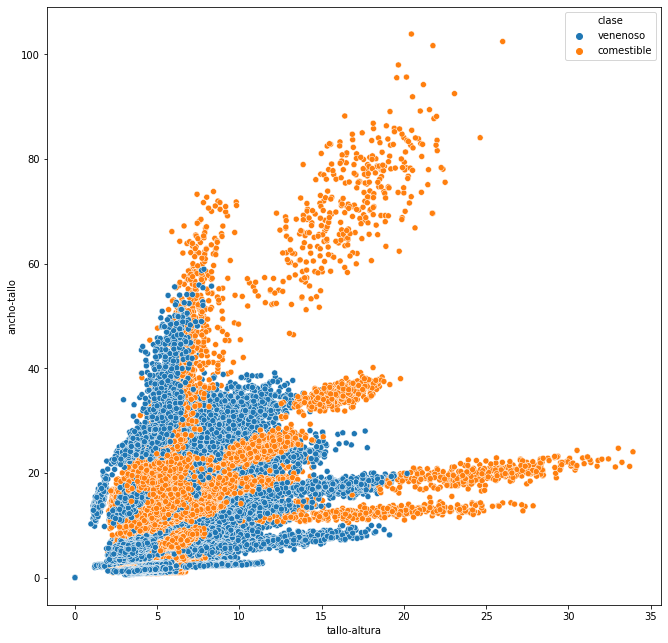

In [ ]:
plt.figure(figsize = (11, 11))
sns.scatterplot(x = df['tallo-altura'], 
            y = df['ancho-tallo'],
            hue = df['clase']);

###Podría decirse de acuerdo a este gráfico de dispersión, que los hongos entre más ancho su tallo y entre mas largo es más seguro para su consumo


In [ ]:
# Cambiar el nombre para más claridad.
df['forma-sombrero'].replace({'b': 'campana',
                         'c': 'conico',
                         'x': 'convexo',
                         'f': 'plano',
                         's': 'hundido',
                         'p': 'esférico',
                         'o': 'otro'},
                        inplace = True)
# Confirmación
df['forma-sombrero'].value_counts()

convexo     26932
plano       13404
hundido      7164
campana      5694
otro         3316
esférico     2598
conico       1815
Name: forma-sombrero, dtype: int64

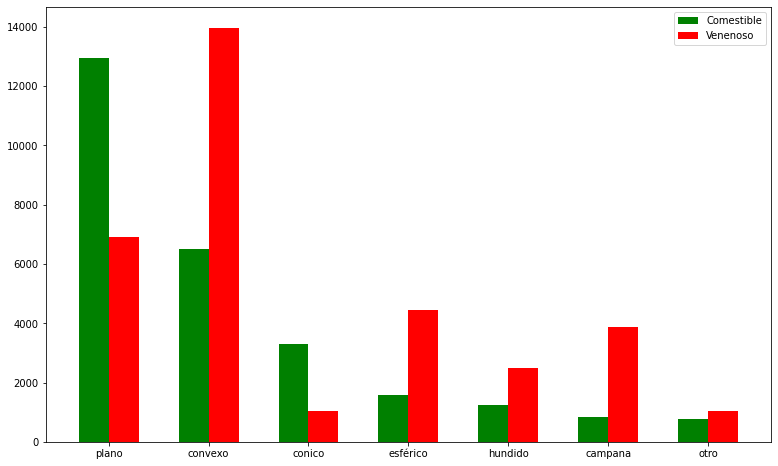

In [ ]:
# Buscar relación entre formas del sombrero y la clase.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['clase'] == 'comestible', 'forma-sombrero'].unique(), 
       height = df.loc[df['clase'] == 'comestible', 'forma-sombrero'].value_counts(),
       width = -0.3, align = 'edge',
       color = 'Green',
       label = 'Comestible')
ax.bar(x = df.loc[df['clase'] == 'venenoso', 'forma-sombrero'].unique(),
       height = df.loc[df['clase'] == 'venenoso', 'forma-sombrero'].value_counts(),
       width = 0.3, align = 'edge',
       color = 'red',
       label = 'Venenoso')
ax.legend();

### Podría concluirse que aunque haya presencia de cada característica en la forma de sombrero, la característica convexa es altamente venenosa. Superando en grn cantidad el número de datos relacionados con el veneno al de los comestibles. Asimismo, aunque en las otras características hayan menos datos, es util resaltar que la forma de campana, hundida y esférica presenta una clara tendencia a que sea venenoso, por lo que debe tener cuidado la presona al notar estas características.

In [ ]:
# Cambiar el nombre para más claridad.
df['superficie-sombrero'].replace({'i': 'fibrosa',
                           'g': 'ranurado',
                           'y': 'escamoso',
                           's': 'suave',
                           'h': 'brillante',
                           'l': 'correoso',
                           'silky': 'sedoso',
                           
                           'k': 'sedoso',
                           't': 'pegajoso',
                           'w': 'arrugado',
                           'e': 'carnoso',
                           'd': 'seco',
                           'M': 'ND'},
                          inplace = True)
df['superficie-sombrero'].value_counts()

ND           14120
pegajoso      8184
suave         7580
escamoso      6341
brillante     4974
ranurado      4722
seco          4432
carnoso       2584
sedoso        2303
fibrosa       2225
arrugado      2150
correoso      1308
Name: superficie-sombrero, dtype: int64

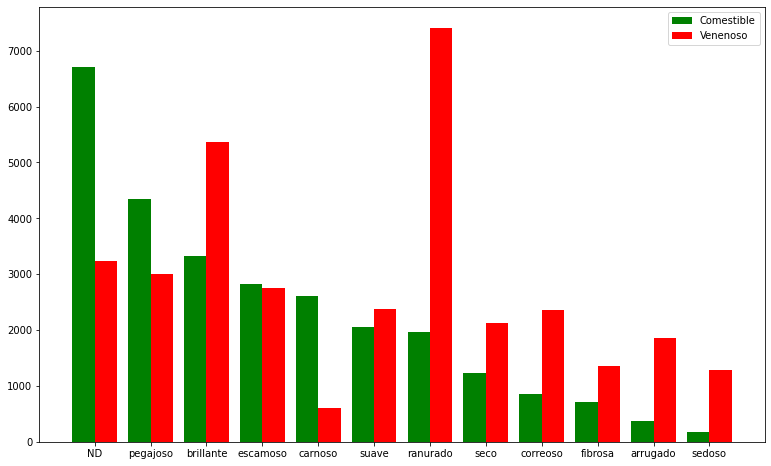

In [ ]:
#Buscar relación entre la superficie del sombrero y la clase.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['clase'] == 'comestible', 'superficie-sombrero'].unique(), 
       height = df.loc[df['clase'] == 'comestible', 'superficie-sombrero'].value_counts(),
       width = -0.4, align = 'edge',
       color = 'Green',
       label = 'Comestible')
ax.bar(x = df.loc[df['clase'] == 'venenoso', 'superficie-sombrero'].unique(),
       height = df.loc[df['clase'] == 'venenoso', 'superficie-sombrero'].value_counts(),
       width = 0.4, align = 'edge',
       color = 'red',
       label = 'Venenoso')
ax.legend();

### Este gráfico comprueba que tener un hongo ranurado tiene una probabilidad altisima de ser venenoso. Asismismo, auqnue hayan menos datos, un hongo sedoso, arrugado o correoso representa tambien un gran riesgo para el consumidor.  Los datos sugieren una relación entre estas caracteristicas y la clase del hongo.


In [ ]:
# Cambiar el nombre para más claridad.
df['color-sombrero'].replace({'n': 'café',
                         'b': 'ante',
                         'g': 'gris',
                         'r': 'verde',
                         'p': 'rosa',
                         'u': 'morado',
                         'e': 'rojo',
                         'w': 'blanco' ,
                         'y': 'amarillo',
                         'l': 'azul',
                         'o': 'naranja',
                         'k': 'negro'},
                        inplace = True)

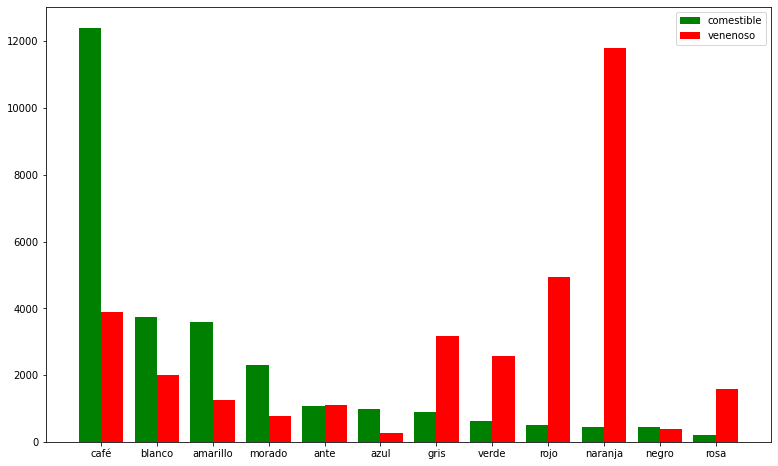

In [ ]:
#Buscar relación entre el color del sombrero y la clase.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (13, 8))
ax.bar(x = df.loc[df['clase'] == 'comestible', 'color-sombrero'].unique(), 
       height = df.loc[df['clase'] == 'comestible', 'color-sombrero'].value_counts(),
       width = -0.4, align = 'edge',
        color = 'Green',
       label = 'comestible')
ax.bar(x = df.loc[df['clase'] == 'venenoso', 'color-sombrero'].unique(),
       height = df.loc[df['clase'] == 'venenoso', 'color-sombrero'].value_counts(),
       width = 0.4, align = 'edge',
       color = 'red',
       label = 'venenoso')
ax.legend();

###Hay una gran cantidad de información en torno a los hongos de color naranja. Estos en un porcentaje altisimo son venenosos. Lo mismo que los rojos, rosa, verdes y grises. Los cafés y amarillos aunque tambien suponen un riesgo, suponen más seguridad con respecto al resto de colores


In [ ]:
df.columns

Index(['clase', 'diametro-sombrero', 'forma-sombrero', 'superficie-sombrero',
       'color-sombrero', 'tiene hemorragias o morados', 'adherencia-branquia',
       'espacio-branquia', 'color-branquia', 'tallo-altura', 'ancho-tallo',
       'color-tallo', 'Tiene anillo', 'tipo-anillo', 'hábitat', 'estacion'],
      dtype='object')

In [ ]:
# Cambiar el nombre para más claridad.
df['tiene hemorragias o morados'].replace({'t': 'sí', 'f': 'no'}, inplace = True)


In [ ]:
df['adherencia-branquia'].replace({'a': 'adnato',
                               'x': 'estrecho',
                               'd': 'decurrente',
                               'e': 'libre',
                               's': 'ondeado',
                               'p': 'poroso',
                               'f': 'nada',
                               'M': 'missing'},
                              inplace = True)

In [ ]:
df['estacion'].replace({'s': 'primavera',
                      'u': 'verano',
                      'a': 'otoño',
                      'w': 'invierno'},
                     inplace = True)


In [ ]:
df['hábitat'].replace({'g': 'prados',
                       'l': 'hojas',
                       'm': 'campos',
                       'p': 'caminos',
                       'h': 'brezales',
                       'u': 'urbano',
                       'w': 'basura',
                       'd': 'leñoso'},
                      inplace = True)

In [ ]:
df['tipo-anillo'].replace({'c': 'telarañoso',
                         'e': 'evanescente',
                         'r': 'resplandeciente',
                         'g': 'estriado',
                         'l': 'largo',
                         'p': 'sobresaliente',
                         's': 'forrado',
                         'z': 'fajado',
                         'y': 'escamoso',
                         'm': 'movible',
                         'f': 'nada',
                         'M': 'missing'},
                        inplace = True)

In [ ]:
df['Tiene anillo'].replace({'t': 'sí', 'f': 'no'}, inplace = True)

In [ ]:
df['color-tallo'].replace({'n': 'café',
                         'b': 'ante',
                         'g': 'gris',
                         'r': 'verde',
                         'p': 'rosa',
                         'u': 'morado',
                         'e': 'rojo',
                         'w': 'blanco' ,
                         'y': 'amarillo',
                         'l': 'azul',
                         'o': 'naranja',
                         'k': 'negro',
                         'f': 'none'},
                        inplace = True)


In [ ]:
df['color-branquia'].replace({'n': 'café',
                         'b': 'ante',
                         'g': 'gris',
                         'r': 'verde',
                         'p': 'rosa',
                         'u': 'morado',
                         'e': 'rojo',
                         'w': 'blanco' ,
                         'y': 'amarillo',
                         'l': 'azul',
                         'o': 'naranja',
                         'k': 'negro',
                         'f': 'none'},
                        inplace = True)

In [ ]:
df['espacio-branquia'].replace({'c': 'cercano',
                            'd': 'distante',
                            'f': 'nada',
                            'M': 'missing'},
                           inplace = True)

In [ ]:
# Vista general para confirmar.
cat_cols = df.select_dtypes(include = 'object')
for col in cat_cols:
  print('Column:', col)
  print(df[col].value_counts(normalize = True))
  print()

Column: clase
venenoso      0.553847
comestible    0.446153
Name: clase, dtype: float64

Column: forma-sombrero
convexo     0.442066
plano       0.220015
hundido     0.117591
campana     0.093462
otro        0.054429
esférico    0.042644
conico      0.029792
Name: forma-sombrero, dtype: float64

Column: superficie-sombrero
ND           0.231768
pegajoso     0.134334
suave        0.124419
escamoso     0.104082
brillante    0.081644
ranurado     0.077508
seco         0.072748
carnoso      0.042414
sedoso       0.037802
fibrosa      0.036522
arrugado     0.035290
correoso     0.021470
Name: superficie-sombrero, dtype: float64

Column: color-sombrero
café        0.397305
amarillo    0.140193
blanco      0.125552
gris        0.070778
rojo        0.066231
naranja     0.059961
verde       0.029201
morado      0.028052
rosa        0.027953
negro       0.020994
ante        0.020189
azul        0.013591
Name: color-sombrero, dtype: float64

Column: tiene hemorragias o morados
no    0.826174
sí  

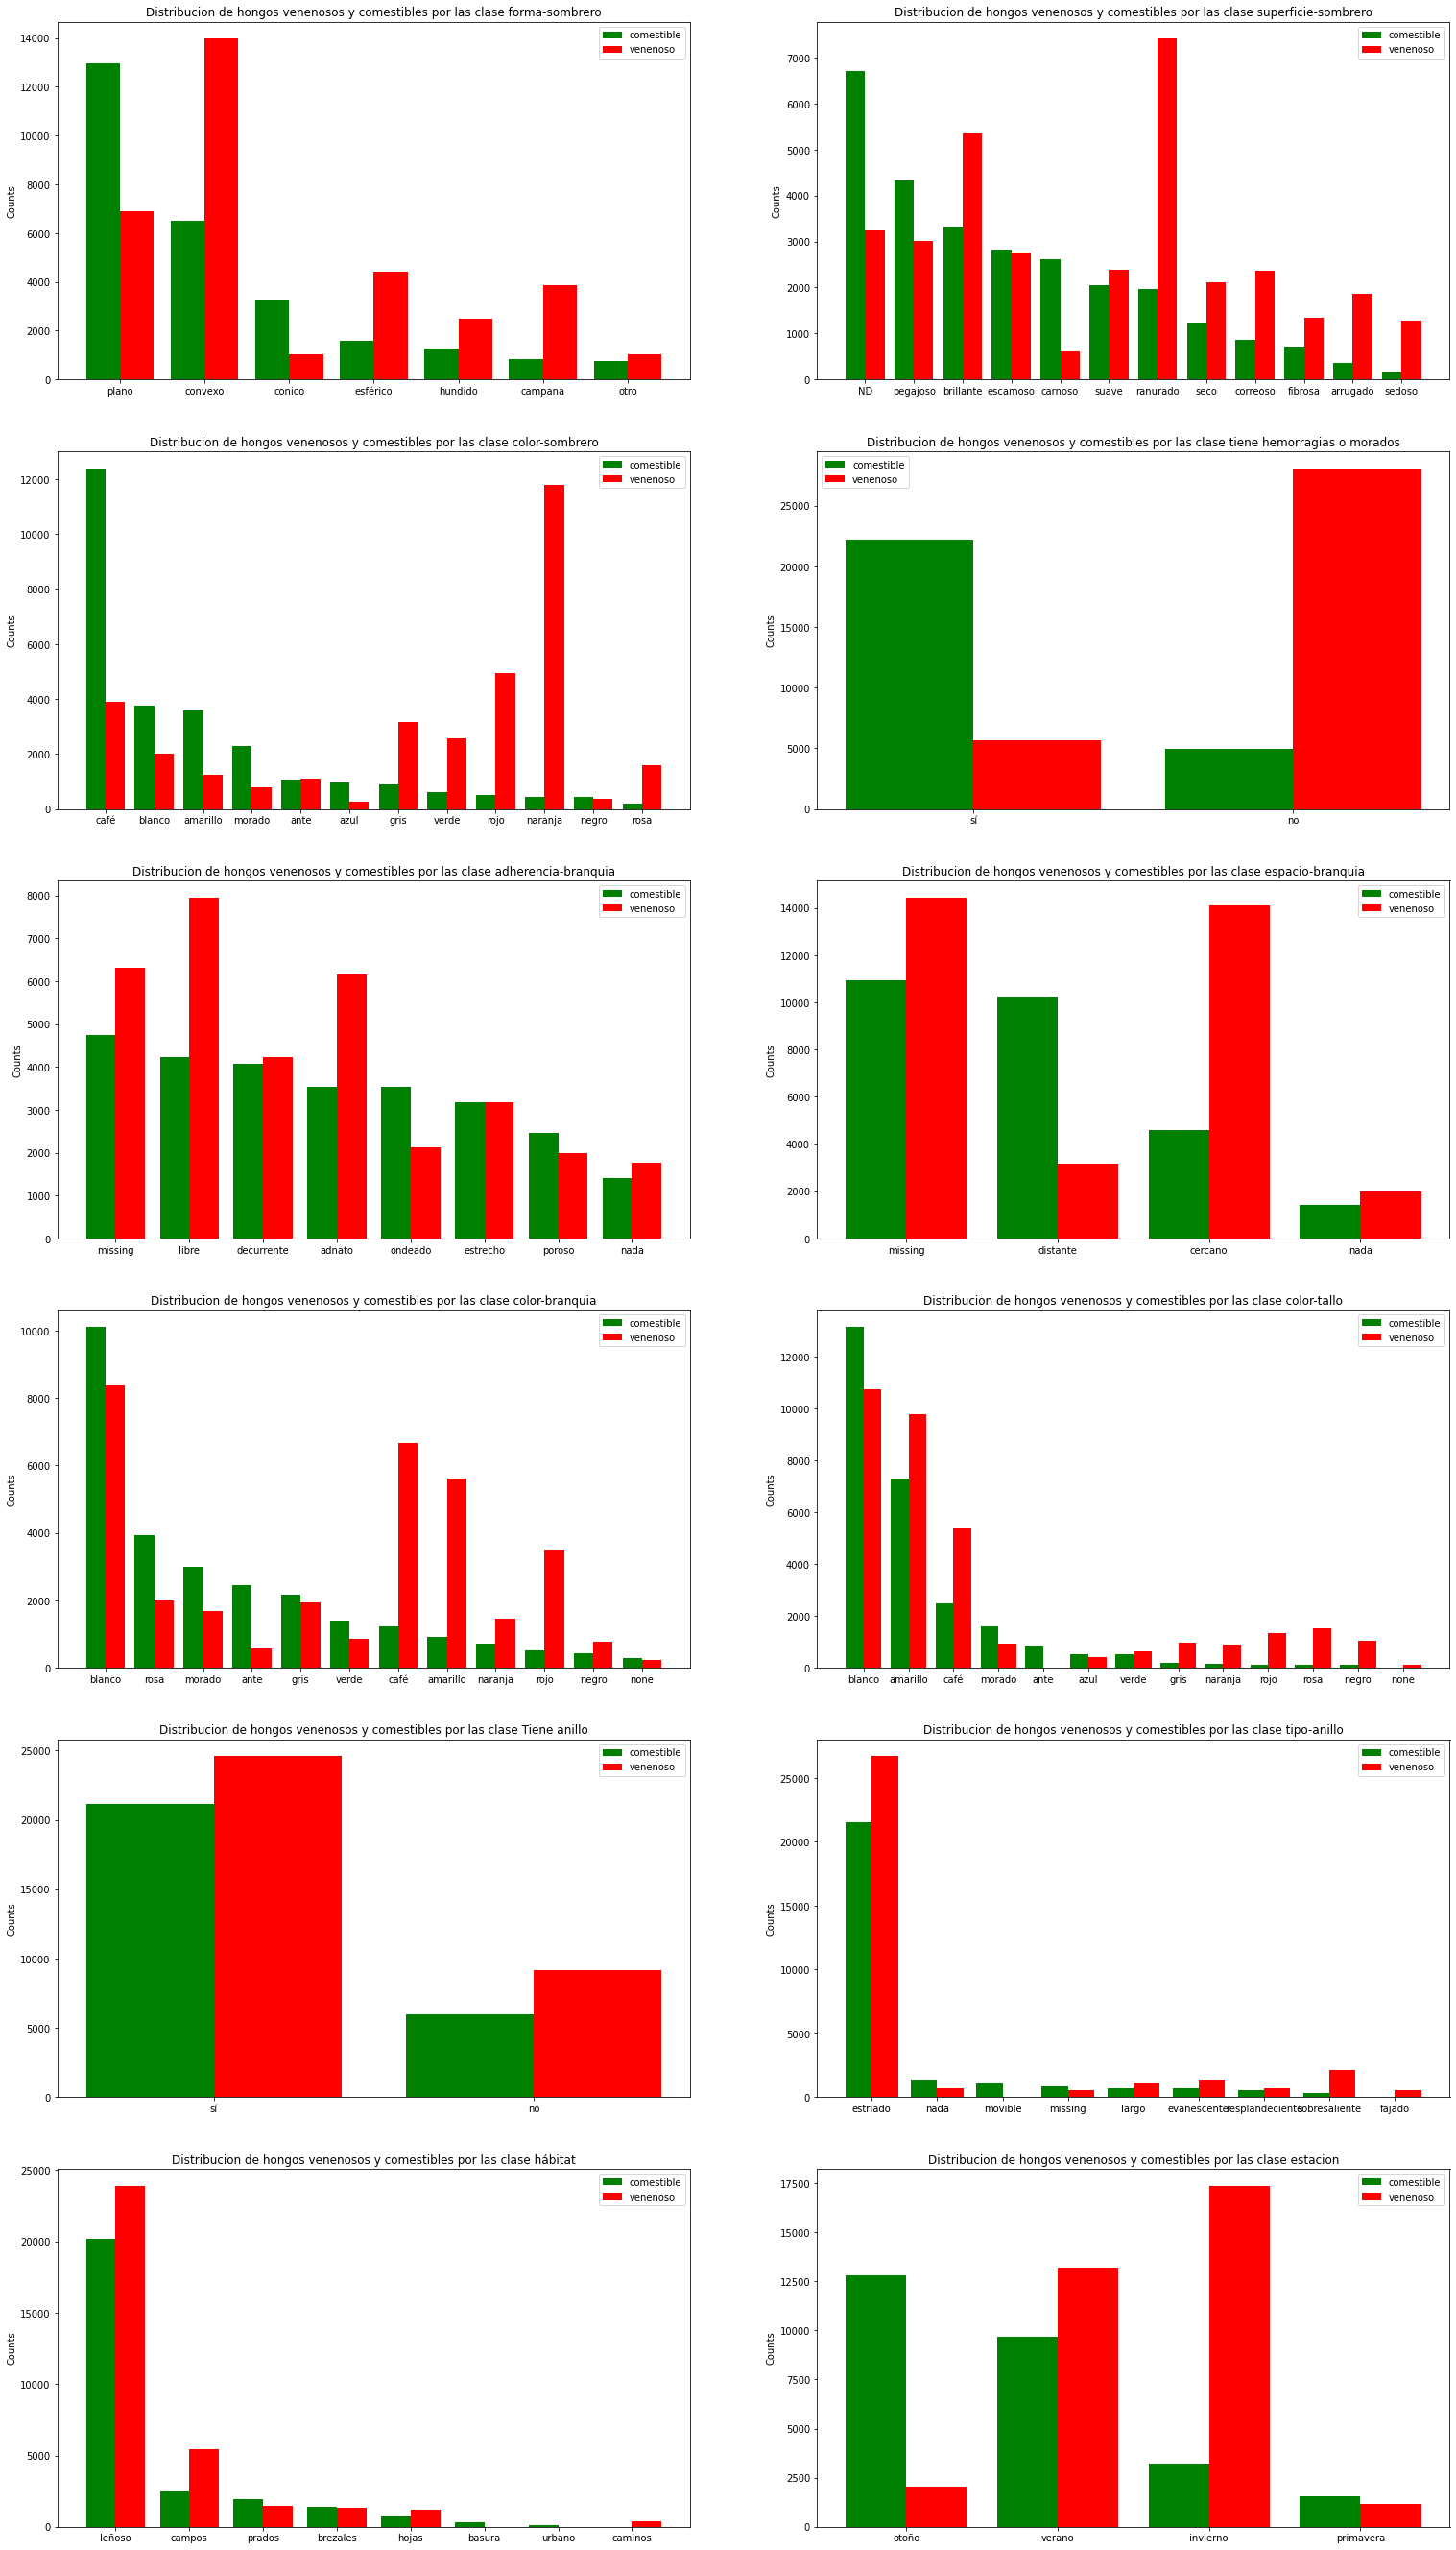

In [ ]:
#construcción de visualización general
cols = df.select_dtypes(include = 'object').columns
cols = cols.drop('clase')

n = int(len(cols) / 2)
fig, axes = plt.subplots(nrows = n, ncols = 2, figsize = (26, 8*n))
axes = axes.ravel()

for i, col in enumerate(cols):
  axes[i].bar(x = df.loc[df['clase'] == 'comestible', col].unique(), 
              height = df.loc[df['clase'] == 'comestible', col].value_counts(),
              width = -0.4, color = 'green', align = 'edge',
              label = 'comestible')
  
  axes[i].bar(x = df.loc[df['clase'] == 'venenoso', col].unique(),
              height = df.loc[df['clase'] == 'venenoso', col].value_counts(),
              width = 0.4, color = 'red', align = 'edge',
                            label = 'venenoso')
  
  axes[i].set_ylabel('Counts')
  axes[i].set_title(f'Distribucion de hongos venenosos y comestibles por las clase {col}')
  axes[i].legend();

Gráfica 1: Ya explicado

Gráfica 2: Ya explicado

Gráfica 3: Ya explicado

Gráfica 4: Hemorragia o morado: Si tiene es muy probable que no sea venenoso. Casi contrario hay una alta probabilidad de ser perjudicial.

Gráfica 5:Adherencia-branquia: Si la branquia es libre o adnata tiene una gran probabilidad de ser venenosa. 

Gráfica 6: Espacio-branquia: Si el espacio es estrecho hay una gran probabilidad de que sea venenoso. Mientras que si hay distancia es más probable que sea comestible.

Gráfica 7: Color tallo: La gran mayoria de registros son de tallos amarillos y blancos. No es concluyente una segmentación entre comestible y venenosor. Solamente hay una gran tendencia a hongos venenosos si el color de su tallo es negro, rosa, rojo, naranja o gris.

Gráfica 8:Color branquia: El color más común es el blanco, hay una distribución equitativa entre comestible y venenoso. Sin embargo, la branquia roja, amarilla y café es muy peligrosa, registra una fuerte tendencia a ser venenosa.

Gráfica 9: Tipo anillo: La mayoría de datos muestran un anillo estriado, su segmentación comestible y venenosa no es concluyente.

Gráfica 10:Tiene anillo: No hay correlación entre el tener anillo y ser venenoso. No es concluyente.

Gráfica 11: Estaciones: Hya una tendencia clara a encontrar hongos venenosos en invierno. Son más comunes en esta estación. En verano y primavera se distribuyen más los hallazgos. Mientras que en otoño disminuye mucho el registro con respecto a los comestibles.

Gráfica 12: Habitat: Hay una alta probabilidad de encontrar hongos en zona leñosa . Es normal encontrar hongos en este habitat pues es comun hallarlos en cercania con arboles pues algunos de estos son mutualistas y conviven con los arboles. Hay el doble de posibilidades de encontrar hongos venenosos en zonas verdes.
